In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
X,y=digits.data,digits.target

In [11]:
X.shape

(1797, 64)

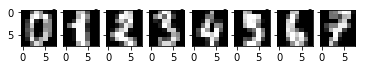

In [14]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1,8,8)[i],'gray')

In [23]:
from sklearn.model_selection import learning_curve

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping

In [28]:
K.clear_session()

In [29]:
model=Sequential()
model.add(Dense(16,input_shape=(64,),activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [30]:
initial_weights=model.get_weights()

In [31]:
y_cat=to_categorical(y,10)

In [34]:
y_cat.shape

(1797, 10)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y_cat,
                                              test_size=0.3)

In [44]:
train_sizes=(len(X_train)*np.linspace(0.1,0.999,4)).astype(int)
train_sizes

array([ 125,  502,  879, 1255])

In [48]:
train_scores=[]
test_scores=[]

for train_size in train_sizes:
    X_train_frac,_,y_train_frac,_=train_test_split(X_train,y_train,train_size=train_size)
    model.set_weights(initial_weights)
    
    h=model.fit(X_train_frac,y_train_frac,
               verbose=0,epochs=450,callbacks=[EarlyStopping(monitor='loss',patience=1)])
    r=model.evaluate(X_train_frac,y_train_frac,verbose=0)
    train_scores.append(r[-1])
    
    e=model.evaluate(X_test,y_test,verbose=0)
    test_scores.append(e[-1])
    print("done size :",train_size)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


done size : 125
done size : 502
done size : 879
done size : 1255


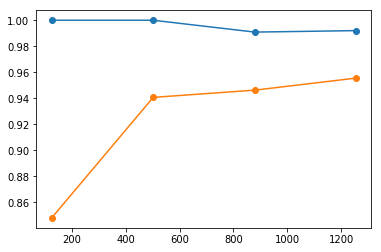

In [49]:
plt.plot(train_sizes,train_scores,'o-',label='train score')
plt.plot(train_sizes,test_scores,'o-',label='test score')

In [54]:
model.predict(X_test)

array([[4.3913124e-12, 1.6362180e-06, 2.6760552e-05, ..., 9.5871292e-06,
        2.6106799e-04, 1.3370709e-06],
       [1.2652044e-02, 4.3133504e-08, 1.6308016e-07, ..., 4.4061005e-07,
        5.7388583e-08, 5.3787504e-12],
       [2.8564251e-10, 4.1928637e-08, 9.9989152e-01, ..., 7.5544492e-08,
        7.6878780e-05, 2.4705371e-09],
       ...,
       [6.0514936e-19, 9.4765729e-10, 8.7530253e-07, ..., 9.9999893e-01,
        1.1859020e-09, 5.5027808e-13],
       [2.3391248e-08, 8.4104762e-08, 9.7390294e-01, ..., 1.0027960e-04,
        2.3923280e-05, 2.9601432e-07],
       [1.2783686e-03, 1.0090483e-03, 4.9659540e-08, ..., 8.0777885e-05,
        1.7602320e-04, 2.3145824e-06]], dtype=float32)